# **Data E-Commerce Customer Churn** #

## **Context** ##

Dataset ini berisikan data E-commerce Customer Churn dan dimiliki oleh perusahaan yang bergerak di bidang Online yaitu di bidang E-Commerce untuk sektor Retail. Perusahaan ingin mengetahui customer mana yang akan berpaling (churn) ke Perusahaan E-commerce Retail yang lain. Dengan begitu perusahaan berencana untuk mendekati customer tersebut dan melakukan pendekatan dengan cara menawarkan beberapa promosi. 

Target:

0 = Tidak Churn (tidak berpaling, alias tetap setia sebagai pelanggan) 

1 = Churn (berpaling ke Retail E-Customer lain)

**Problem Statement :**

Dalam mempertahankan customer, perusahaan biasanya sudah megupayakan beberapa strategi. Misalnya dengan memberikan pelayanan service , waktu antar, customer service dan masih banyak lagi. Salah satu strategi adalah biaya promosi. Dimana biaya promosi dapat membuat ikatan emosional kepada customer untuk tetap menggunakan layanan perusahaan.  

**Goals :**

Maka berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang/ organisasi untuk tetap setia  menggunakan layanan yang disediakan oleh perusahaan.

Dan juga, perusahaan ingin mengetahui apa/faktor/variabel apa yang membuat seorang kandidat mau belanja dan menggunakan servis dari perusahaan atau tidak, sehingga perusahaan dapat membuat rencana yang lebih baik dalam mendekati kandidat pelanggan (kandidat yang belanja dan menggunakan servis yang disediakan oleh perusahaan) .

**Analytic Approach :**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan kandidat yang mau tidak churn dan  kandidat mana yang akan churn (beralih ke retail e-commerce lain).

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang kandidat akan/ingin tetap menggunakan service di perusahaan atau tidak.

Untuk metrics-nya akan menggunakan F2-Score, dengan pertimbangan untuk mengetahui apakah pelanggan berpaling atau tidak. 
F2 Score: F2 Score adalah varian dari F1 Score yang memberi lebih banyak bobot pada recall daripada presisi. Ini digunakan ketika Anda ingin mengurangi kesalahan false negative (misalnya, dalam deteksi penyakit). Formula F2 Score adalah sebagai berikut:

F2 Score = (1 + 2^2) * (Presisi * Recall) / (2^2 * Presisi + Recall)

F2 Score memberikan lebih banyak penalti terhadap false negative daripada F1 Score, karena bobot yang lebih besar (2^2 atau 4) ditempatkan pada recall.

## **Data Understanding** ##

**Attribute Information** 

# Features

| Fitur                    | Deskripsi                                                                               |
|--------------------------|-----------------------------------------------------------------------------------------|
| Tenure                   | Masa kerja pelanggan di perusahaan.                                                    |
| WarehouseToHome         | Jarak antara gudang ke rumah pelanggan.                                                |
| NumberOfDeviceRegistered | Jumlah total perangkat terdaftar pada pelanggan tertentu.                               |
| PreferedOrderCat        | Kategori pesanan yang lebih disukai oleh pelanggan dalam sebulan terakhir.             |
| SatisfactionScore       | Nilai kepuasan pelanggan terhadap layanan.                                             |
| MaritalStatus           | Status perkawinan pelanggan.                                                           |
| NumberOfAddress         | Jumlah total alamat yang ditambahkan pada pelanggan tertentu.                           |
| Complaint               | Apakah ada keluhan yang diajukan dalam sebulan terakhir.                              |
| DaySinceLastOrder       | Hari sejak pesanan terakhir oleh pelanggan.                                           |
| CashbackAmount          | Jumlah rata-rata cashback dalam sebulan terakhir.                                    |
| Churn                   | Tanda churn (berhenti berlangganan).                                                  |


## **Data Cleaning** ##

In [1]:
# Library
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

In [2]:
# Membuka Data
data = pd.read_csv('data_ecommerce_customer_churn.csv')
data

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


In [3]:
data.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [4]:
OHE = ['PreferedOrderCat', 'NumberOfAddress', 'MaritalStatus']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [6]:
# Check Duplication

data.duplicated().sum()


671

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
# Check Duplication apakah masih ada atau sudah dibuang

data.duplicated().sum()


0

In [9]:
# Check the mv

data.isna().sum()

Tenure                      160
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

In [10]:
# Check more detail
tenure_columns = data['Tenure']

# Create a new column to categorize the values
data['Tenure_Status'] = 'Unknown'
data.loc[tenure_columns.isna(), 'Tenure_Status'] = 'NaN'
data.loc[tenure_columns == 0, 'Tenure_Status'] = '0'
data.loc[tenure_columns == '-', 'Tenure_Status'] = '-'

# Now you can access the "WarehouseToHome_Status" column to see the categories
print(data['Tenure_Status'].value_counts())

Tenure_Status
Unknown    2828
0           282
NaN         160
Name: count, dtype: int64


In [11]:
# Check more detail
warehouse_to_home_column = data['WarehouseToHome']

# Create a new column to categorize the values
data['WarehouseToHome_Status'] = 'Unknown'
data.loc[warehouse_to_home_column.isna(), 'WarehouseToHome_Status'] = 'NaN'
data.loc[warehouse_to_home_column == 0, 'WarehouseToHome_Status'] = '0'
data.loc[warehouse_to_home_column == '-', 'WarehouseToHome_Status'] = '-'

# Now you can access the "WarehouseToHome_Status" column to see the categories
print(data['WarehouseToHome_Status'].value_counts())

WarehouseToHome_Status
Unknown    3135
NaN         135
Name: count, dtype: int64


In [12]:
# Check more detail
day_since_last_order_column = data['DaySinceLastOrder']

# Create a new column to categorize the values
data['DaySinceLastOrder_Status'] = 'Unknown'
data.loc[day_since_last_order_column.isna(), 'DaySinceLastOrder_Status'] = 'NaN'
data.loc[day_since_last_order_column == 0, 'DaySinceLastOrder_Status'] = '0'
data.loc[day_since_last_order_column == '-', 'DaySinceLastOrder_Status'] = '-'

# Now you can access the "WarehouseToHome_Status" column to see the categories
print(data['DaySinceLastOrder_Status'].value_counts())

DaySinceLastOrder_Status
Unknown    2803
0           286
NaN         181
Name: count, dtype: int64


In [13]:
unknown_values = data[data['WarehouseToHome_Status'] == 'Unknown']
print(unknown_values)


      Tenure  WarehouseToHome  NumberOfDeviceRegistered    PreferedOrderCat  \
0       15.0             29.0                         4  Laptop & Accessory   
1        7.0             25.0                         4              Mobile   
2       27.0             13.0                         3  Laptop & Accessory   
3       20.0             25.0                         4             Fashion   
4       30.0             15.0                         4              Others   
...      ...              ...                       ...                 ...   
3933    25.0             15.0                         5             Fashion   
3935    26.0              7.0                         4             Grocery   
3936    28.0              9.0                         5             Fashion   
3937     8.0              7.0                         2        Mobile Phone   
3940     2.0              7.0                         3  Laptop & Accessory   

      SatisfactionScore MaritalStatus  NumberOfAddr

Mencari kolom mana yang mengandung NaN dan menggunakan looping agar dapat tercover

In [14]:
# Assuming 'data' is your DataFrame
columns_with_nan = data.columns[data.isna().any()].tolist()

# Create a dictionary to store rows with NaN values for each column
nan_rows_dict = {}
for column in columns_with_nan:
    nan_rows = data[data[column].isna()]
    nan_rows_dict[column] = nan_rows

# Print or access the rows with NaN values for each column
for column, nan_rows in nan_rows_dict.items():
    print(f"Rows with NaN values in column '{column}':")
    print(nan_rows)








Rows with NaN values in column 'Tenure':
      Tenure  WarehouseToHome  NumberOfDeviceRegistered PreferedOrderCat  \
16       NaN             21.0                         5           Mobile   
37       NaN              6.0                         4           Mobile   
44       NaN              7.0                         4           Mobile   
85       NaN              6.0                         3           Mobile   
93       NaN             15.0                         3           Mobile   
...      ...              ...                       ...              ...   
3792     NaN             24.0                         3           Mobile   
3814     NaN              8.0                         3           Mobile   
3842     NaN             26.0                         3           Mobile   
3853     NaN             28.0                         3     Mobile Phone   
3879     NaN             16.0                         3           Mobile   

      SatisfactionScore MaritalStatus  NumberO

In [15]:
# Merubah Missing value NaN menggunakan median

columns_to_fill_with_median = ['Tenure', 'WarehouseToHome', 'WarehouseToHome_Status', 'DaySinceLastOrder', 'DaySinceLastOrder_Status']

for column in columns_to_fill_with_median:
    # Jika kolom memiliki tipe data objek, ganti NaN dengan "Unknown"
    if data[column].dtype == 'object':
        data[column].fillna("Unknown", inplace=True)
    else:
        # Jika bukan kolom dengan tipe data objek, isi NaN dengan median
        median_value = data[column].median()
        data[column].fillna(median_value, inplace=True)


In [16]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 3270 entries, 0 to 3940
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3270 non-null   float64
 1   WarehouseToHome           3270 non-null   float64
 2   NumberOfDeviceRegistered  3270 non-null   int64  
 3   PreferedOrderCat          3270 non-null   object 
 4   SatisfactionScore         3270 non-null   int64  
 5   MaritalStatus             3270 non-null   object 
 6   NumberOfAddress           3270 non-null   int64  
 7   Complain                  3270 non-null   int64  
 8   DaySinceLastOrder         3270 non-null   float64
 9   CashbackAmount            3270 non-null   float64
 10  Churn                     3270 non-null   int64  
 11  Tenure_Status             3270 non-null   object 
 12  WarehouseToHome_Status    3270 non-null   object 
 13  DaySinceLastOrder_Status  3270 non-null   object 
dtypes: float64(4)

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
Tenure_Status               0
WarehouseToHome_Status      0
DaySinceLastOrder_Status    0
dtype: int64

In [17]:
# Menampilkan gambaran informasi dari setiap Kolom

listItem = []
for col in data.columns :
    listItem.append([col, data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum()/len(data[col])) * 100,2),
                    data[col].nunique(), list(data[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Tenure,float64,0,0.0,36,"[60.0, 2.0]"
1,WarehouseToHome,float64,0,0.0,33,"[20.0, 9.0]"
2,NumberOfDeviceRegistered,int64,0,0.0,6,"[3, 2]"
3,PreferedOrderCat,object,0,0.0,6,"[Others, Grocery]"
4,SatisfactionScore,int64,0,0.0,5,"[1, 5]"
5,MaritalStatus,object,0,0.0,3,"[Single, Divorced]"
6,NumberOfAddress,int64,0,0.0,14,"[10, 4]"
7,Complain,int64,0,0.0,2,"[1, 0]"
8,DaySinceLastOrder,float64,0,0.0,22,"[8.0, 11.0]"
9,CashbackAmount,float64,0,0.0,2335,"[126.95, 120.28]"


Disini saya akan menghapus beberapa kolom seperti 'Tenure_Status','WarehouseToHome_Status','DaySinceLastOrder_Status' dimana jika dilihat tidak ada hubungan dengan Machine Learning.

In [18]:
# Drop Kolom yang tidak diperlukan

data.drop(['Tenure_Status','WarehouseToHome_Status','DaySinceLastOrder_Status'],axis=1, inplace=True)

In [19]:
# Melihat columns

data.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn'],
      dtype='object')

In [20]:
# Cek apakah sudah terhapus atau belum

listItem = []
for col in data.columns :
    listItem.append([col, data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum()/len(data[col])) * 100,2),
                    data[col].nunique(), list(data[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Tenure,float64,0,0.0,36,"[19.0, 24.0]"
1,WarehouseToHome,float64,0,0.0,33,"[6.0, 21.0]"
2,NumberOfDeviceRegistered,int64,0,0.0,6,"[6, 2]"
3,PreferedOrderCat,object,0,0.0,6,"[Fashion, Mobile]"
4,SatisfactionScore,int64,0,0.0,5,"[1, 4]"
5,MaritalStatus,object,0,0.0,3,"[Married, Single]"
6,NumberOfAddress,int64,0,0.0,14,"[9, 21]"
7,Complain,int64,0,0.0,2,"[1, 0]"
8,DaySinceLastOrder,float64,0,0.0,22,"[16.0, 18.0]"
9,CashbackAmount,float64,0,0.0,2335,"[261.64, 162.55]"


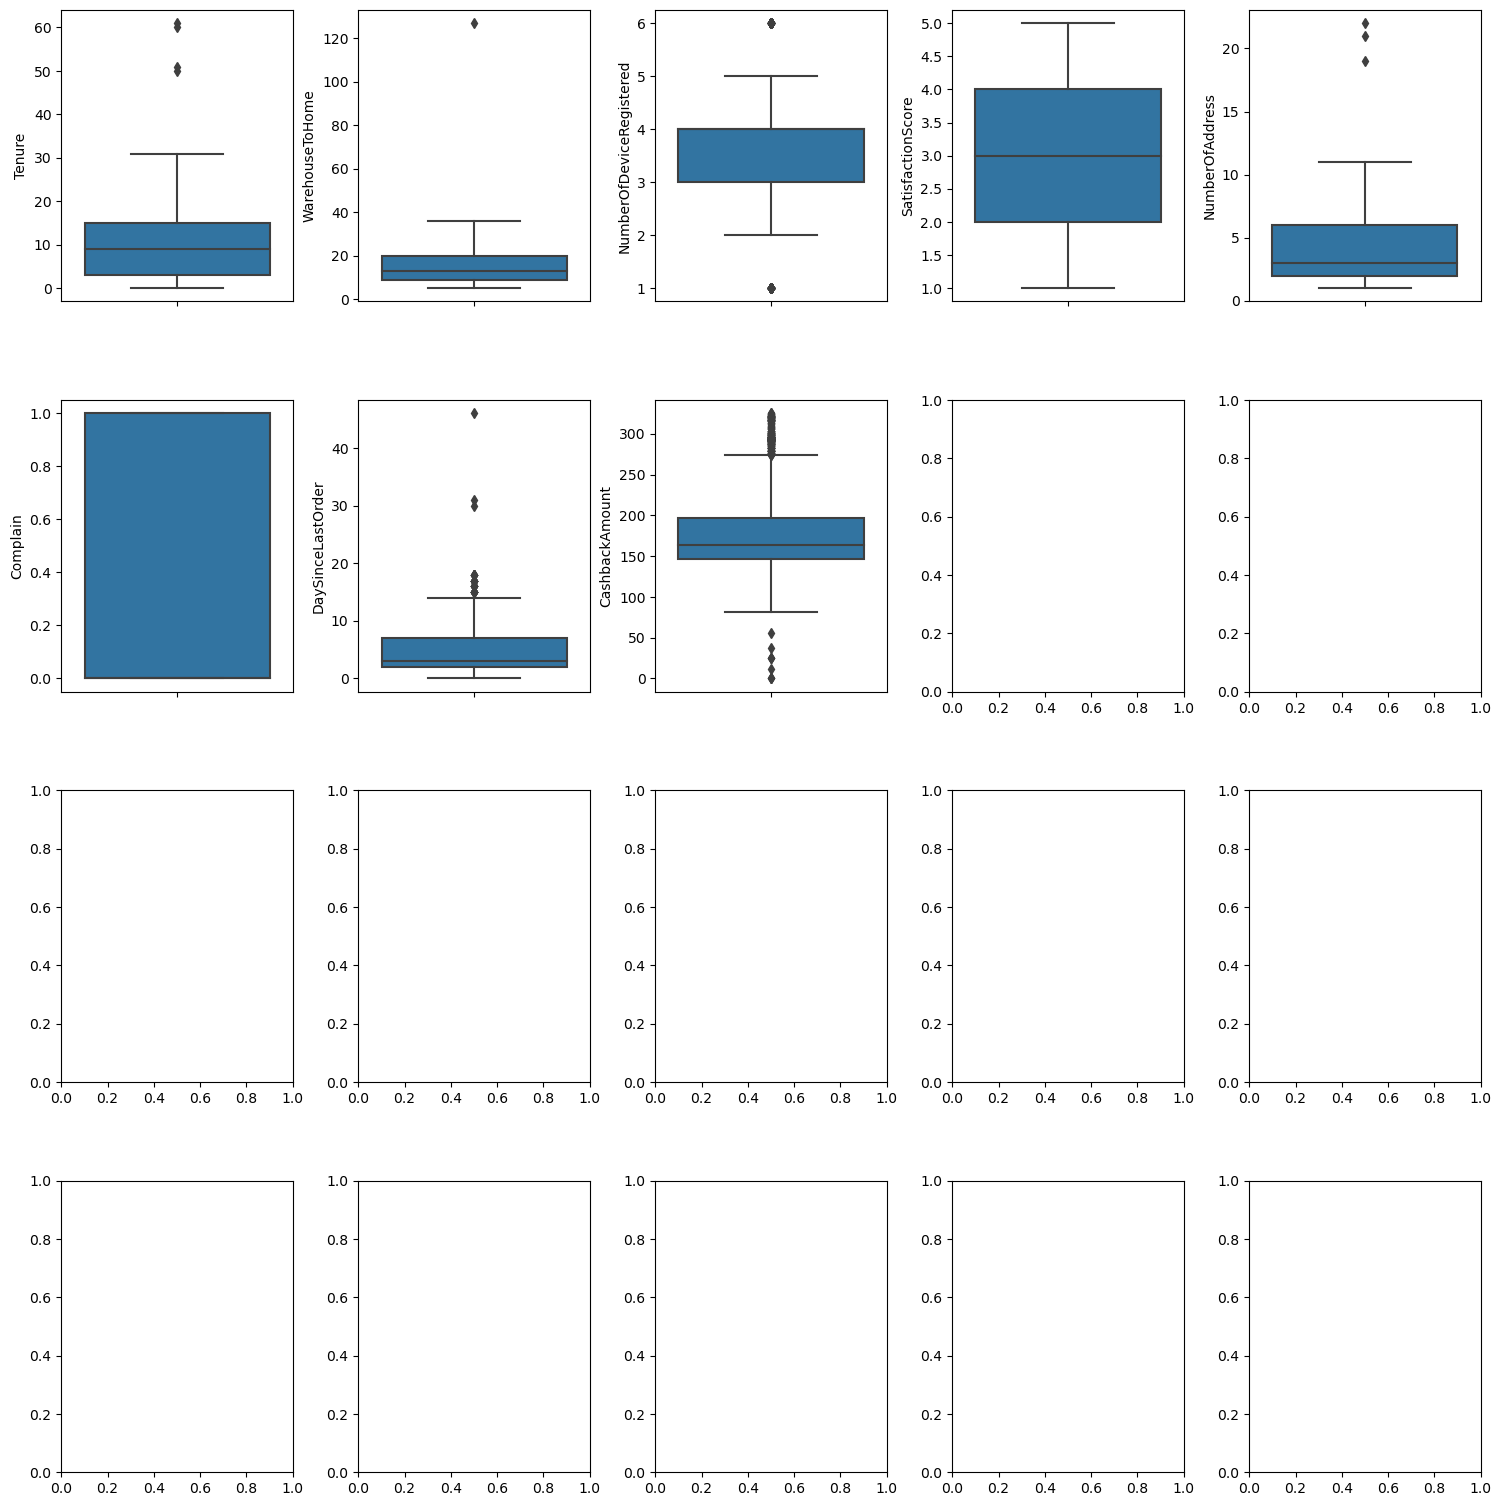

In [21]:
numericCols = data.drop(['Churn','PreferedOrderCat','MaritalStatus' ],axis=1).select_dtypes(include=[float, int]).columns

fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(15,15))
index = 0
ax = ax.flatten()

for col in numericCols:
    sns.boxplot(y=col, data=data, ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

plt.show()


## **FEATURED ENGINEERING** ##

In [22]:
# Schema
# from sklearn.pipeline import make_pipeline, Pipeline
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Encoding
import category_encoders as ce
# Missing value imputer
from sklearn.impute import SimpleImputer

# Imbalance Sampling
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

#F Scores
from sklearn.metrics import fbeta_score, make_scorer

# MODELS
# Linear
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
# DT
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Neighbour
from sklearn.neighbors import KNeighborsClassifier
# SVC
from sklearn.svm import SVC
# Ensemble
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Train Test
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, mean_squared_error
# Dataset
# from sklearn.datasets import load_breast_cancer, load_diabetes


import warnings
warnings.filterwarnings('ignore')

### **TARGET PROPORTION**

In [23]:
data['Churn'].value_counts()/len(data)*100

Churn
0    83.669725
1    16.330275
Name: count, dtype: float64

### **SCALING, ENCODING, & BALANCING**

In [24]:
smote = SMOTE(random_state=2023)
ros = RandomOverSampler(random_state=2023)
rus = RandomUnderSampler(random_state=2023)
nm = NearMiss()

In [25]:
numericCols

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount'],
      dtype='object')

Dari scatterplot diatas, dapat dilihat ada beberapa kesenjangan untuk skalanya. Sehingga diputuskan untuk menggunakan RobustScaller. Robust Scaler adalah metode penskalaan yang digunakan untuk mengatasi outliers dalam data. Outliers adalah nilai-nilai yang sangat jauh dari sebagian besar data dan dapat mempengaruhi metode penskalaan tradisional seperti penskalaan Min-Max atau Z-score (Standard Scaler).

In [26]:
# Mentransform data ke bentuk yang kita butuhkan

transform = ColumnTransformer([
    ('scaler', RobustScaler(), ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore',
                'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']),
    ('OHE', OneHotEncoder(drop='first'),['PreferedOrderCat', 'MaritalStatus', 'Complain'])
],remainder='passthrough')

transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', RobustScaler(),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'DaySinceLastOrder', 'CashbackAmount']),
                                ('OHE', OneHotEncoder(drop='first'),
                                 ['PreferedOrderCat', 'MaritalStatus',
                                  'Complain'])])

In [27]:
data['Churn'].value_counts()/len(data)*100

Churn
0    83.669725
1    16.330275
Name: count, dtype: float64

### **TRAIN TEST SPLIT**

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3270 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3270 non-null   float64
 1   WarehouseToHome           3270 non-null   float64
 2   NumberOfDeviceRegistered  3270 non-null   int64  
 3   PreferedOrderCat          3270 non-null   object 
 4   SatisfactionScore         3270 non-null   int64  
 5   MaritalStatus             3270 non-null   object 
 6   NumberOfAddress           3270 non-null   int64  
 7   Complain                  3270 non-null   int64  
 8   DaySinceLastOrder         3270 non-null   float64
 9   CashbackAmount            3270 non-null   float64
 10  Churn                     3270 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 306.6+ KB


In [29]:
data.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn'],
      dtype='object')

Untuk masuk ke bagian Test split, pembagiannya adalah 80:20. Datasat menggunakan fungsi train_test_split dari pustaka scikit-learn (sklearn) untuk membagi dataset menjadi dua bagian: 80% data akan digunakan untuk pelatihan (train) dan 20% data akan digunakan untuk pengujian (test). Ini adalah pembagian data dalam rasio 80:20.

In [30]:
X = data[['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']]
y = data['Churn']

xtrain, xtest, ytrain, ytest = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2,
    random_state=2023
)


### **MODEL LISTING**

In [31]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

Untuk model, akan digunakan DecisionTreeClassifier, Logistic Regression, Kneighbors Classifier, XGB Classifier dan RandomForest Classifier. Kemudian kita akan melakukan kombinasi (ensemble) menggunakan Voting Classifier agar hasilnya dapat lebih baik

In [32]:
tree = DecisionTreeClassifier(max_depth=5, random_state=2023) 
logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)
xgb = XGBClassifier(random_state=2023)
rf = RandomForestClassifier(2023)
vc = VotingClassifier(estimators=[
    ('model1', tree),
    ('model2', knn),
    ('model3', logreg),
    ('model4', xgb),
    ('model5', rf)
], voting='soft')
sc = StackingClassifier(estimators=[
    ('model1', tree),
    ('model2', knn),
    ('model3', logreg),
    ('model4', xgb),
     ('model5', rf)
], final_estimator=SVC())

Disini proses Benchmarking dan Cross Validation akan dilakukan untuk mengetahui model yang terbaik 

### **CROSS VALIDATION SCORE & BENCHMARKING**

In [33]:
# Define the f2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

model = [tree, logreg, knn, xgb, rf]
resamp = [smote, ros, rus, nm]
m_tracker = []
resamp_tracker = []
score = []
f2 = []
std = []

for i in model:
    for j in resamp:
        model_pipe = Pipeline([
            ('trans', transform),
            ('imba', j),
            ('clf', i)
        ])
        pipecv = cross_val_score(model_pipe, xtrain, ytrain, cv=5, scoring=f2_scorer)
        score.append(pipecv)
        f2.append(pipecv.mean())
        std.append(pipecv.std())
        m_tracker.append(i)
        resamp_tracker.append(j)

scoresheet = pd.DataFrame({
    'Model': m_tracker,
    'Resamp': resamp_tracker,
    'F2 Score': f2,
    'F2 std': std
}).sort_values('F2 Score', ascending=False)

scoresheet

,Model,Resamp,F2 Score,F2 std
18,RandomForestClassifier(n_estimators=2023),RandomUnderSampler(random_state=2023),0.765038,0.022223
13,"XGBClassifier(base_score=None, booster=None, c...",RandomOverSampler(random_state=2023),0.731169,0.032882
14,"XGBClassifier(base_score=None, booster=None, c...",RandomUnderSampler(random_state=2023),0.726762,0.006996
17,RandomForestClassifier(n_estimators=2023),RandomOverSampler(random_state=2023),0.718618,0.011518
12,"XGBClassifier(base_score=None, booster=None, c...",SMOTE(random_state=2023),0.701317,0.034123
16,RandomForestClassifier(n_estimators=2023),SMOTE(random_state=2023),0.700978,0.017995
5,LogisticRegression(),RandomOverSampler(random_state=2023),0.679001,0.016140
1,"DecisionTreeClassifier(max_depth=5, random_sta...",RandomOverSampler(random_state=2023),0.678632,0.020195
4,LogisticRegression(),SMOTE(random_state=2023),0.677277,0.015073
6,LogisticRegression(),RandomUnderSampler(random_state=2023),0.671541,0.017120


In [34]:
data.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,3.0,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


Random Forest Test before Tuning

In [35]:
model_pipe = Pipeline([
        ('trans', transform),
        ('clf', rf)
    ])

model_pipe.fit(xtrain, ytrain)
pred = model_pipe.predict(xtest)
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       547
           1       0.68      0.61      0.64       107

    accuracy                           0.89       654
   macro avg       0.80      0.78      0.79       654
weighted avg       0.89      0.89      0.89       654



In [36]:
best_model = rf
best_resampler = RandomUnderSampler(random_state=2023)
pipeline_best = Pipeline([
            ('trans', transform),
            ('imba', best_resampler),
            ('clf', best_model)
])

pipeline_best.fit(xtrain, ytrain)

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', RobustScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus',
                                                   'Complain'])])),
                ('imba', RandomUnderSampler(random_state=2023)),
                ('clf', RandomForestClassifier(n_estimators=2023))])

In [37]:
pipeline_best.fit(xtrain, ytrain)
pred = pipeline_best.predict(xtest)
print(classification_report(ytest, pred))

f2_scorer = fbeta_score(ytest, pred, beta=2)
print(f'f2 score pada data test adalah {f2_scorer}')

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       547
           1       0.54      0.91      0.68       107

    accuracy                           0.86       654
   macro avg       0.76      0.88      0.79       654
weighted avg       0.91      0.86      0.87       654

f2 score pada data test adalah 0.7976973684210525


Voting test before tuning

In [38]:
model_pipe = Pipeline([
        ('trans', transform),
        ('clf', vc)
    ])

model_pipe.fit(xtrain, ytrain)
pred = model_pipe.predict(xtest)
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       547
           1       0.70      0.56      0.62       107

    accuracy                           0.89       654
   macro avg       0.81      0.76      0.78       654
weighted avg       0.88      0.89      0.88       654



In [39]:
best_model = vc
best_resampler = RandomUnderSampler(random_state=2023)
pipeline_best = Pipeline([
            ('trans', transform),
            ('imba', best_resampler),
            ('clf', best_model)
])

pipeline_best.fit(xtrain, ytrain)

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', RobustScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus',
                                                   'Complain'])])),
                ('imba', RandomUnderSample...
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=2023, ...)),
                                              ('model5',
                                               RandomForestClassifier(n_estimators=2023))],
                                  voting='soft'))])

In [40]:
pipeline_best.fit(xtrain,ytrain)
pred = pipeline_best.predict(xtest)
print (classification_report(ytest,pred))

f2_score = fbeta_score(ytest, pred, beta=2)

print("F2 Score on Test Data:", f2_score)

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       547
           1       0.51      0.86      0.64       107

    accuracy                           0.84       654
   macro avg       0.74      0.85      0.77       654
weighted avg       0.89      0.84      0.85       654

F2 Score on Test Data: 0.7540983606557377


XGB Model Test

In [41]:
model_pipe = Pipeline([
        ('trans', transform),
        ('clf', xgb)
    ])

model_pipe.fit(xtrain, ytrain)
pred = model_pipe.predict(xtest)
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       547
           1       0.68      0.65      0.67       107

    accuracy                           0.89       654
   macro avg       0.81      0.80      0.80       654
weighted avg       0.89      0.89      0.89       654



In [42]:
best_model = xgb
best_resampler = RandomUnderSampler(random_state=2023)
pipeline_best = Pipeline([
            ('trans', transform),
            ('imba', best_resampler),
            ('clf', best_model)
])

pipeline_best.fit(xtrain, ytrain)

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', RobustScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus',
                                                   'Complain'])])),
                ('imba', RandomUnderSample...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=2023, ...))])

In [43]:
pipeline_best.fit(xtrain,ytrain)
pred = pipeline_best.predict(xtest)
print (classification_report(ytest,pred))

f2_score = fbeta_score(ytest, pred, beta=2)

print("F2 Score on Test Data:", f2_score)

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       547
           1       0.51      0.86      0.64       107

    accuracy                           0.84       654
   macro avg       0.74      0.85      0.77       654
weighted avg       0.89      0.84      0.85       654

F2 Score on Test Data: 0.7540983606557377


KNN Test before Tuning

In [44]:
model_pipe = Pipeline([
        ('trans', transform),
        ('clf', knn)
    ])

model_pipe.fit(xtrain, ytrain)
pred = model_pipe.predict(xtest)
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       547
           1       0.72      0.41      0.52       107

    accuracy                           0.88       654
   macro avg       0.81      0.69      0.73       654
weighted avg       0.87      0.88      0.86       654



In [45]:
best_model = knn
best_resampler = RandomUnderSampler(random_state=2023)
pipeline_best = Pipeline([
            ('trans', transform),
            ('imba', best_resampler),
            ('clf', best_model)
])

pipeline_best.fit(xtrain, ytrain)

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', RobustScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus',
                                                   'Complain'])])),
                ('imba', RandomUnderSampler(random_state=2023)),
                ('clf', KNeighborsClassifier())])

In [46]:
pipeline_best.fit(xtrain,ytrain)
pred = pipeline_best.predict(xtest)
print (classification_report(ytest,pred))

f2_score = fbeta_score(ytest, pred, beta=2)

print("F2 Score on Test Data:", f2_score)

              precision    recall  f1-score   support

           0       0.96      0.80      0.87       547
           1       0.44      0.81      0.57       107

    accuracy                           0.80       654
   macro avg       0.70      0.81      0.72       654
weighted avg       0.87      0.80      0.82       654

F2 Score on Test Data: 0.696


Logreg Test before Tuning

In [47]:
model_pipe = Pipeline([
        ('trans', transform),
        ('clf', logreg)
    ])

model_pipe.fit(xtrain, ytrain)
pred = model_pipe.predict(xtest)
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       547
           1       0.61      0.42      0.50       107

    accuracy                           0.86       654
   macro avg       0.75      0.68      0.71       654
weighted avg       0.85      0.86      0.85       654



In [48]:
best_model = logreg
best_resampler = RandomUnderSampler(random_state=2023)
pipeline_best = Pipeline([
            ('trans', transform),
            ('imba', best_resampler),
            ('clf', best_model)
])

pipeline_best.fit(xtrain, ytrain)

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', RobustScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus',
                                                   'Complain'])])),
                ('imba', RandomUnderSampler(random_state=2023)),
                ('clf', LogisticRegression())])

In [49]:
pipeline_best.fit(xtrain,ytrain)
pred = pipeline_best.predict(xtest)
print (classification_report(ytest,pred))

f2_score = fbeta_score(ytest, pred, beta=2)

print("F2 Score on Test Data:", f2_score)

              precision    recall  f1-score   support

           0       0.96      0.79      0.87       547
           1       0.44      0.85      0.58       107

    accuracy                           0.80       654
   macro avg       0.70      0.82      0.72       654
weighted avg       0.88      0.80      0.82       654

F2 Score on Test Data: 0.7176656151419558


Tree Model Test before Tuning

In [50]:
model_pipe = Pipeline([
        ('trans', transform),
        ('clf', tree)
    ])

model_pipe.fit(xtrain, ytrain)
pred = model_pipe.predict(xtest)
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       547
           1       0.55      0.60      0.57       107

    accuracy                           0.85       654
   macro avg       0.73      0.75      0.74       654
weighted avg       0.86      0.85      0.86       654



In [51]:
best_model = tree
best_resampler = RandomUnderSampler(random_state=2023)
pipeline_best = Pipeline([
            ('trans', transform),
            ('imba', best_resampler),
            ('clf', best_model)
])

pipeline_best.fit(xtrain, ytrain)

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', RobustScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus',
                                                   'Complain'])])),
                ('imba', RandomUnderSampler(random_state=2023)),
                ('clf',
                 DecisionTreeClassifier(max_depth=5, random_state=2023))])

In [52]:
pipeline_best.fit(xtrain,ytrain)
pred = pipeline_best.predict(xtest)
print (classification_report(ytest,pred))

f2_score = fbeta_score(ytest, pred, beta=2)

print("F2 Score on Test Data:", f2_score)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       547
           1       0.44      0.79      0.56       107

    accuracy                           0.80       654
   macro avg       0.70      0.79      0.72       654
weighted avg       0.87      0.80      0.82       654

F2 Score on Test Data: 0.678513731825525


## **Tuning** ##

Untuk case ini kita akan coba tuning Model RandomForest dan XGB saja, karena keduanya merupakan model yang memberikan hasil tinggi

RandomForest Tuning

In [53]:
f2_scorer = make_scorer(fbeta_score, beta=2)

# Define the hyperparameters to tune
param_grid = {
    'clf__n_estimators': [50, 100, 150],  # Number of trees in the forest
    'clf__max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'clf__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__criterion': ['gini', 'entropy']  # Minimum number of samples required to be a leaf node
}

# Create the Random Forest pipeline
rf_pipeline = Pipeline([
    ('trans', transform),
    ('clf', RandomForestClassifier())
])

# Create GridSearchCV object
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring=f2_scorer)

# Fit the grid search to your data
grid_search.fit(xtrain, ytrain)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# Get the model with the best hyperparameters
best_rf_model = grid_search.best_estimator_

# Evaluate the model with the best hyperparameters
best_score = cross_val_score(best_rf_model, xtrain, ytrain, cv=5, scoring=f2_scorer)
print("F2 Score with Best Hyperparameters:", best_score.mean())


Best Hyperparameters:
{'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
F2 Score with Best Hyperparameters: 0.6271765054896615


In [54]:
best_model = RandomForestClassifier(criterion='entropy',max_depth=None,min_samples_leaf=1,min_samples_split=2,n_estimators= 150)
pipeline_best = Pipeline([
    ('trans', transform),  
    ('classifier', best_model)     # Model terbaik
])

pipeline_best

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', RobustScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus',
                                                   'Complain'])])),
                ('classifier',
                 RandomForestClassifier(criterion='entropy',
                                        n_estimators=150))])

In [55]:
pipeline_best.fit(xtrain,ytrain)
pred = pipeline_best.predict(xtest)
print (classification_report(ytest,pred))

f2_score = fbeta_score(ytest, pred, beta=2)

print("F2 Score on Test Data:", f2_score)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       547
           1       0.71      0.60      0.65       107

    accuracy                           0.89       654
   macro avg       0.82      0.78      0.79       654
weighted avg       0.89      0.89      0.89       654

F2 Score on Test Data: 0.6177606177606177


Tuning Hard Vote

In [56]:
# Membuat objek model untuk masing-masing classifier
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
logreg = LogisticRegression()
rf = RandomForestClassifier()
xgb = XGBClassifier() 

f2_scorer = make_scorer(fbeta_score, beta=2)

# Membuat VotingClassifier
voting_classifier_hard = VotingClassifier(estimators=[
    ('dt', dt),
    ('knn', knn),
    ('logreg', logreg),
    ('rf', rf),
    ('xgb', xgb)
], voting='hard')  
# Gabungkan dengan pipeline Anda
pipeline_voting_hard = Pipeline([
    ('trans', transform),
    ('classifier', voting_classifier_hard)
])

# Tentukan hyperparameter yang akan di-tune bersamaan dengan rentang nilai yang mungkin
param_dist = {
    'classifier__dt__max_depth': [None, 10, 20, 30],
    'classifier__knn__n_neighbors': [3, 5, 7, 10],
    'classifier__logreg__C': [0.1, 1, 10],
    'classifier__rf__n_estimators': [50, 100, 200],
    'classifier__xgb__n_estimators': [50, 100, 200],
    'classifier__xgb__max_depth': [3, 5, 7],
}

# Buat objek RandomizedSearchCV untuk melakukan hyperparameter tuning
random_search = RandomizedSearchCV(pipeline_voting_hard, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42, verbose=2,scoring=f2_scorer)

# Lakukan fitting pada model untuk mencari parameter terbaik
random_search.fit(xtrain, ytrain)

# Setelah proses pencarian selesai, Anda dapat mengakses parameter terbaik dan skor terbaik
print("Parameter terbaik:", random_search.best_params_)
print("Skor terbaik:", random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Parameter terbaik: {'classifier__xgb__n_estimators': 100, 'classifier__xgb__max_depth': 5, 'classifier__rf__n_estimators': 100, 'classifier__logreg__C': 1, 'classifier__knn__n_neighbors': 5, 'classifier__dt__max_depth': None}
Skor terbaik: 0.6232780484547462


In [57]:
# Membuat objek model untuk masing-masing classifier
dt = DecisionTreeClassifier(max_depth=30)
knn = KNeighborsClassifier(n_neighbors=5)
logreg = LogisticRegression(C=10)
rf = RandomForestClassifier(n_estimators=200)
xgb = XGBClassifier(n_estimators=200, max_depth=5)


# Membuat VotingClassifier dengan weighted voting
voting_classifier_hard = VotingClassifier(estimators=[
    ('dt', dt),
    ('knn', knn),
    ('logreg', logreg),
    ('rf', rf),
    ('xgb', xgb)
], voting='hard')  # Menggunakan 'hard' untuk hard voting

# Gabungkan dengan pipeline Anda
pipeline_voting_hard = Pipeline([
    ('trans', transform),
    ('classifier', voting_classifier_hard)
])


In [58]:
pipeline_voting_hard.fit(xtrain,ytrain)
pred = pipeline_voting_hard.predict(xtest)
print (classification_report(ytest,pred))

f2_score = fbeta_score(ytest, pred, beta=2)

print("F2 Score on Test Data:", f2_score)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       547
           1       0.72      0.62      0.66       107

    accuracy                           0.90       654
   macro avg       0.82      0.78      0.80       654
weighted avg       0.89      0.90      0.89       654

F2 Score on Test Data: 0.6346153846153846


Tuning Voting (Soft Vote)

In [59]:
# Membuat objek model untuk masing-masing classifier
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
logreg = LogisticRegression()
rf = RandomForestClassifier()
xgb = XGBClassifier()

f2_scorer = make_scorer(fbeta_score, beta=2)

# Membuat VotingClassifier dengan weighted voting (soft voting)
voting_classifier_soft = VotingClassifier(estimators=[
    ('dt', dt),
    ('knn', knn),
    ('logreg', logreg),
    ('rf', rf),
    ('xgb', xgb)
], voting='soft')  # Menggunakan 'soft' untuk weighted voting

# Gabungkan dengan pipeline Anda
pipeline_voting_soft = Pipeline([
    ('trans', transform),
    ('classifier', voting_classifier_soft)
])

# Tentukan hyperparameter yang akan di-tune bersamaan dengan rentang nilai yang mungkin
param_dist = {
    'classifier__dt__max_depth': [None, 10, 20, 30],
    'classifier__knn__n_neighbors': [3, 5, 7, 10],
    'classifier__logreg__C': [0.1, 1, 10],
    'classifier__rf__n_estimators': [50, 100, 200],
    'classifier__xgb__n_estimators': [50, 100, 200],
    'classifier__xgb__max_depth': [3, 5, 7],
}

# Buat objek RandomizedSearchCV untuk melakukan hyperparameter tuning
random_search = RandomizedSearchCV(pipeline_voting_soft, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42, verbose=2,scoring=f2_scorer)


# Lakukan fitting pada model untuk mencari parameter terbaik
random_search.fit(xtrain, ytrain)

# Setelah proses pencarian selesai, Anda dapat mengakses parameter terbaik dan skor terbaik
print("Parameter terbaik:", random_search.best_params_)
print("Skor terbaik:", random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Parameter terbaik: {'classifier__xgb__n_estimators': 50, 'classifier__xgb__max_depth': 7, 'classifier__rf__n_estimators': 100, 'classifier__logreg__C': 1, 'classifier__knn__n_neighbors': 5, 'classifier__dt__max_depth': 30}
Skor terbaik: 0.6612097922722625


In [60]:
# Membuat objek model untuk masing-masing classifier
dt = DecisionTreeClassifier(max_depth=30)
knn = KNeighborsClassifier(n_neighbors=10)
logreg = LogisticRegression(C=10)
rf = RandomForestClassifier(n_estimators=200)
xgb = XGBClassifier(n_estimators=100, max_depth=7)

# Membuat VotingClassifier dengan hard voting dan parameter-parameter yang telah Anda tunjukkan
voting_classifier_soft = VotingClassifier(estimators=[
    ('dt', dt),
    ('knn', knn),
    ('logreg', logreg),
    ('rf', rf),
    ('xgb', xgb)
], voting='soft')  # Menggunakan 'hard' untuk hard voting

# Gabungkan dengan pipeline Anda
pipeline_voting_soft = Pipeline([
    ('trans', transform),
    ('classifier', voting_classifier_soft)
])


In [61]:
pipeline_voting_soft.fit(xtrain,ytrain)
pred = pipeline_voting_soft.predict(xtest)
print (classification_report(ytest,pred))

f2_score = fbeta_score(ytest, pred, beta=2)

print("F2 Score on Test Data:", f2_score)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       547
           1       0.71      0.64      0.68       107

    accuracy                           0.90       654
   macro avg       0.82      0.80      0.81       654
weighted avg       0.90      0.90      0.90       654

F2 Score on Test Data: 0.6571428571428573


Tuning XGB Model

In [62]:
xgb = XGBClassifier()
f2_scorer = make_scorer(fbeta_score, beta=2)

pipeline_xgb = Pipeline([
    ('trans', transform),
    ('classifier', xgb)
])

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.1, 0.01, 0.001],
    'classifier__max_depth': [3, 4, 5],
}

grid_search = GridSearchCV(pipeline_xgb, param_grid, cv=5, n_jobs=-1, verbose=1, scoring=f2_scorer)

grid_search.fit(xtrain, ytrain)

print("Parameter terbaik:", grid_search.best_params_)
print("Skor F2 terbaik:", grid_search.best_score_)



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Parameter terbaik: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 300}
Skor F2 terbaik: 0.7027267397196034


In [63]:
xgb = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=300)

pipeline_xgb = Pipeline([
    ('trans', transform),
    ('classifier', xgb)
])

pipeline_xgb

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', RobustScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus',
                                                   'Complain'])])),
                ('classifier',
                 XGBClassifi...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [64]:
pipeline_xgb.fit(xtrain,ytrain)
pred = pipeline_xgb.predict(xtest)
print (classification_report(ytest,pred))

f2_score = fbeta_score(ytest, pred, beta=2)

print("F2 Score on Test Data:", f2_score)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       547
           1       0.69      0.67      0.68       107

    accuracy                           0.90       654
   macro avg       0.81      0.81      0.81       654
weighted avg       0.90      0.90      0.90       654

F2 Score on Test Data: 0.6766917293233083


Hasil yang didapatkan yaitu, F2-Score metrics dengan modul RF lebih besar ketika sebelum dituning yaitu sebesar 79% sedangkan setelah tuning menggunakan Hard Vote yang hanya 65%, sedangkan menggunakan Soft Vote hanya sebesar 59%.

## **Coclusion** ##

Dari hasil test yang telah dilakukan maka dapat disimpulkan dengan menggunakan F2 Score sebelum tuning dengan model Random Forest merupakan hasil yang tertinggi dengan F2 Score sebesar 79% menunjukkan Recall dengan kelas 0: tidak churn sebesar 85% dan kelas 1 sebesar 91%. 
Artinya customer cenderung untuk Churn (berpaling ke E-commerce lain), sehingga Perusahaan dianggap perlu untuk membuat anggaran promosi untuk mencegahnya.


## **Recommendation** ##

Tindakan yang dapat dilakukan untuk mendeteksi dan mencegah agar customer dapat terus setia berbelanja di Perusahaan kita selain biaya promosi, antara lain:

1. Mengadakan online questionnaire secara berkala untuk menanyakan ada atau tidaknya ketidakpuasan, sehingga dapat dideteksi  secara dini apabila ada tanda-tanda customer akan churn

2. Memperkuat departemen customer service agar dapat menangani keluhan pelanggan dengan baik
